# CktGym Training Visualization

## Import data and libraries

In [1]:
import json
import tqdm
import random
import pandas as pd
import matplotlib as plt
import matplotlib.colors as mcolors

colors = list(mcolors.TABLEAU_COLORS.values())

# Had to replace all newline characters and put individual JSON objects on separate lines
filename = 'formatted_logs.jsonl'

raw_data = pd.read_json(path_or_buf=filename, lines=True)

In [2]:
fields = {"action_steps_taken": 0,
          "curr_inputs": 0,
          "curr_outputs": 0,
          "ideal_outputs": 0,
          "curr_output_norm": 0,
          "ideal_output_norm": 0,
          "observation": 0}

for field in fields:
    fields[field] = pd.DataFrame(raw_data[field].values.tolist())
    fields[field].columns = map(str, fields[field].columns)
    fields[field].columns = field + "_" + fields[field].columns

In [3]:
fields["action_steps_taken"].head()

,action_steps_taken_alpha,action_steps_taken_beta,action_steps_taken_cc,action_steps_taken_gamma,action_steps_taken_nbias,action_steps_taken_ncasc,action_steps_taken_ninp,action_steps_taken_pbias,action_steps_taken_pcasc,action_steps_taken_pinp,action_steps_taken_vcb
0,0,2,2,-1,2,0,0,2,2,-1,2
1,0,2,2,0,2,2,2,0,2,-1,-1
2,-1,2,0,2,2,-1,-1,-1,2,2,-1
3,0,2,-1,0,0,-1,-1,2,2,-1,2
4,-1,-1,0,0,2,2,2,2,2,2,-1


In [4]:
data = pd.concat([fields[field] for field in fields],axis=1)
data = raw_data.join(data)
data = data.drop(fields.keys(), axis=1)

In [5]:
data

,training_step,done,reward,action_steps_taken_alpha,action_steps_taken_beta,action_steps_taken_cc,action_steps_taken_gamma,action_steps_taken_nbias,action_steps_taken_ncasc,action_steps_taken_ninp,...,observation_9,observation_10,observation_11,observation_12,observation_13,observation_14,observation_15,observation_16,observation_17,observation_18
0,481,True,10,0,2,2,-1,2,0,0,...,6.0,2.0,6.0,2.0,3.0,2.0,4.0,1.0,220.0,1020.0
1,542,True,10,0,2,2,0,2,2,2,...,4.0,4.0,6.0,4.0,3.0,2.0,4.0,2.0,190.0,1020.0
2,663,True,10,-1,2,0,2,2,-1,-1,...,3.0,1.0,6.0,1.0,6.0,1.0,4.0,4.0,190.0,1000.0
3,1146,True,10,0,2,-1,0,0,-1,-1,...,7.0,1.0,7.0,1.0,2.0,1.0,3.0,1.0,230.0,1030.0
4,1539,True,10,-1,-1,0,0,2,2,2,...,5.0,3.0,4.0,5.0,7.0,1.0,2.0,1.0,180.0,1040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,18799,True,10,-1,2,2,0,2,0,-1,...,6.0,2.0,6.0,1.0,4.0,1.0,4.0,2.0,200.0,1020.0
447,18861,True,10,-1,-1,-1,-1,-1,0,-1,...,6.0,4.0,6.0,1.0,3.0,1.0,3.0,1.0,190.0,1010.0
448,18896,True,10,-1,2,2,-1,-1,0,-1,...,3.0,5.0,9.0,2.0,9.0,1.0,3.0,2.0,220.0,1050.0
449,18899,True,10,-1,2,-1,0,-1,-1,0,...,4.0,2.0,6.0,6.0,1.0,1.0,5.0,1.0,210.0,1030.0


In [6]:
def get_random_color():
    index = random.randrange(len(colors))
    return colors[index]

def get_subfields(field):
    return list(fields[field].columns)

def field_plot(field, variables):
    if len(variables) == 0:
        return fields[field].plot()
    if field in variables[0]:
        if len(variables) == 1:
            return fields[field].plot(y=variables, color=get_random_color())
        return fields[field].plot(y=variables)
    return fields[field].plot(y=[field + "_" + str(x) for x in variables])

def all_subfields_plot(field):
    subfields = get_subfields(field)
    for subfield in subfields:
        field_plot(field, [subfield])

In [12]:
for field in fields:
    print("\n" + field + ":")
    print(get_subfields(field))


action_steps_taken:
['action_steps_taken_alpha', 'action_steps_taken_beta', 'action_steps_taken_cc', 'action_steps_taken_gamma', 'action_steps_taken_nbias', 'action_steps_taken_ncasc', 'action_steps_taken_ninp', 'action_steps_taken_pbias', 'action_steps_taken_pcasc', 'action_steps_taken_pinp', 'action_steps_taken_vcb']

curr_inputs:
['curr_inputs_nbias', 'curr_inputs_pbias', 'curr_inputs_ncasc', 'curr_inputs_pcasc', 'curr_inputs_ninp', 'curr_inputs_pinp', 'curr_inputs_alpha', 'curr_inputs_beta', 'curr_inputs_gamma', 'curr_inputs_vcb', 'curr_inputs_cc']

curr_outputs:
['curr_outputs_gain', 'curr_outputs_ugbw', 'curr_outputs_phm', 'curr_outputs_ibias']

ideal_outputs:
['ideal_outputs_gain', 'ideal_outputs_ugbw', 'ideal_outputs_phm', 'ideal_outputs_ibias']

curr_output_norm:
['curr_output_norm_gain', 'curr_output_norm_ugbw', 'curr_output_norm_phm', 'curr_output_norm_ibias']

ideal_output_norm:
['ideal_output_norm_gain', 'ideal_output_norm_ugbw', 'ideal_output_norm_phm', 'ideal_output_nor

<Axes: >

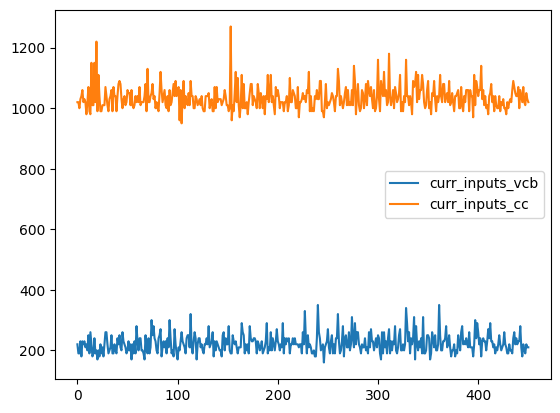

In [15]:
field_plot("curr_inputs", ['curr_inputs_vcb', 'curr_inputs_cc'])

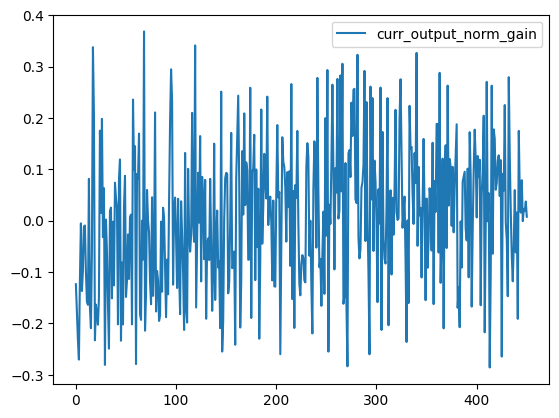

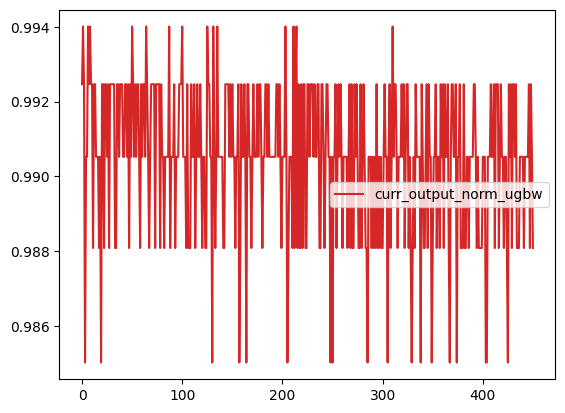

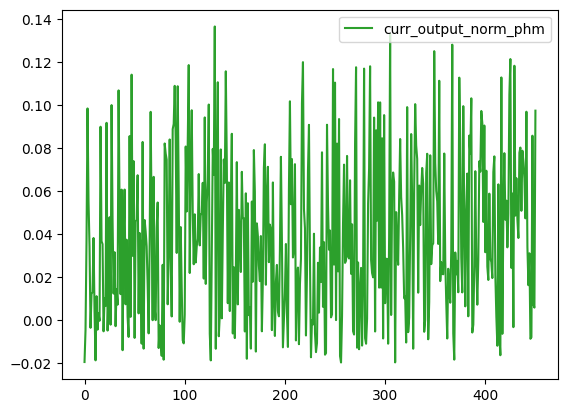

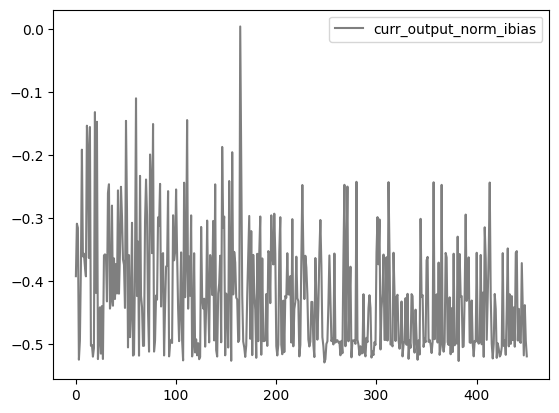

In [9]:
all_subfields_plot("curr_output_norm")